In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# data loading by using keras
training_set = tf.keras.utils.image_dataset_from_directory(
    'new_train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 10960 files belonging to 30 classes.


In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'new_validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224,224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3706 files belonging to 30 classes.


In [4]:
for x,y in training_set: # x-> pix.. value y-> label
    print (x , x.shape)
    print(y , y.shape)
    break

tf.Tensor(
[[[[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  ...

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]]


 [[[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 2

In [5]:
# building model

from tensorflow.keras.layers import Dense , Conv2D , MaxPool2D , Flatten , BatchNormalization , Dropout
from tensorflow.keras.models import Sequential

In [34]:
from tensorflow.keras.optimizers.legacy import Adam

In [35]:
model = Sequential()

In [37]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same' , activation='relu', input_shape=[224,224 , 3])) # rectified linear unit
model.add(Conv2D(filters=32,kernel_size=3,padding='same' , activation='relu')) # 224x224x32
# model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2))

In [38]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same' , activation='relu', input_shape=[224,224 , 3]))
model.add(Conv2D(filters=64,kernel_size=3,padding='same' , activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2))

In [39]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same' , activation='relu', input_shape=[224,224 , 3]))
model.add(Conv2D(filters=128,kernel_size=3,padding='same' , activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2))

In [11]:
# model.add(Conv2D(filters=256,kernel_size=3,padding='same' , activation='relu', input_shape=[224,224 , 3]))
# model.add(Conv2D(filters=256,kernel_size=3,padding='same' , activation='relu'))
# # model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=2 , strides=2))

In [40]:
# flattenig operation
model.add(Flatten())

In [41]:
model.add(Dense(units=1024,activation='relu'))

In [42]:
model.add(Dropout(0.5))

In [43]:
# output layer
model.add(Dense(units=30 , activation='softmax'))

In [44]:
# compiling model 
model.compile(optimizer='Adam' , loss='categorical_crossentropy',metrics=['accuracy'])

Early Stoping

In [45]:
from keras.callbacks import  EarlyStopping
callback =EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

In [46]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 224, 224, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 112, 112, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 112, 112, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 56, 56, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1024)           │    25,691,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 30)             │        30,750 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,027,390 (99.29 MB)

 Trainable params: 26,027,390 (99.29 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
import torch

print("Number of GPU: ", torch.cuda.device_count())
print("GPU Name: ", torch.cuda.get_device_name())


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Number of GPU:  1
GPU Name:  NVIDIA GeForce RTX 3050 Laptop GPU
Using device: cuda


In [48]:
# model training
training_model=model.fit(x=training_set,validation_data=validation_set,epochs=15 , callbacks=callback)

Epoch 1/15


343/343 ━━━━━━━━━━━━━━━━━━━━ 255s 740ms/step - accuracy: 0.3286 - loss: 3.8041 - val_accuracy: 0.7032 - val_loss: 0.9774
Epoch 2/15
343/343 ━━━━━━━━━━━━━━━━━━━━ 274s 798ms/step - accuracy: 0.8100 - loss: 0.6053 - val_accuracy: 0.7615 - val_loss: 0.8720
Epoch 3/15
343/343 ━━━━━━━━━━━━━━━━━━━━ 289s 844ms/step - accuracy: 0.8959 - loss: 0.3245 - val_accuracy: 0.7987 - val_loss: 0.7279
Epoch 4/15
343/343 ━━━━━━━━━━━━━━━━━━━━ 283s 825ms/step - accuracy: 0.9307 - loss: 0.2128 - val_accuracy: 0.8003 - val_loss: 0.7568
Epoch 5/15
343/343 ━━━━━━━━━━━━━━━━━━━━ 290s 846ms/step - accuracy: 0.9532 - loss: 0.1434 - val_accuracy: 0.7809 - val_loss: 0.8623
Epoch 6/15
343/343 ━━━━━━━━━━━━━━━━━━━━ 287s 838ms/step - accuracy: 0.9542 - loss: 0.1438 - val_accuracy: 0.8397 - val_loss: 0.6431
Epoch 7/15
343/343 ━━━━━━━━━━━━━━━━━━━━ 288s 839ms/step - accuracy: 0.9693 - loss: 0.0971 - val_accuracy: 0.8119 - val_loss: 0.7217
Epoch 8/15
343/343 ━━━━━━━━━━━━━━━━━━━━ 287s 837ms/step - accuracy: 0.9716 - loss: 0.09

In [49]:
# model evaluation on training set

training_loss , train_accuracy = model.evaluate(training_set)

343/343 ━━━━━━━━━━━━━━━━━━━━ 55s 159ms/step - accuracy: 0.9869 - loss: 0.0477


In [50]:
print(training_loss , train_accuracy)

0.033226128667593 0.9906021952629089


In [51]:
# model evaluation on training set

validation_loss , validation_accuracy = model.evaluate(validation_set)

116/116 ━━━━━━━━━━━━━━━━━━━━ 17s 144ms/step - accuracy: 0.8425 - loss: 0.6953


In [52]:
print(validation_loss , validation_accuracy )

0.7173582911491394 0.8402590155601501


In [53]:
# saving the model

model.save("trained_model_2.0.h5")

In [54]:
model.save("trained_model_2.0.keras")

In [55]:
tf.keras.callbacks.History()

In [56]:
training_model.history

{'accuracy': [0.5240876078605652,
  0.8429744243621826,
  0.9140511155128479,
  0.9388686418533325,
  0.9542883038520813,
  0.9595803022384644,
  0.9674270153045654,
  0.9718977808952332,
  0.9722627997398376,
  0.9743613004684448,
  0.9726277589797974],
 'loss': [1.8904852867126465,
  0.4945305287837982,
  0.2688414752483368,
  0.19217990338802338,
  0.13963542878627777,
  0.12436630576848984,
  0.10814899206161499,
  0.09346791356801987,
  0.09119319915771484,
  0.08401498943567276,
  0.08799941092729568],
 'val_accuracy': [0.7031840085983276,
  0.7614678740501404,
  0.7987048029899597,
  0.8003237843513489,
  0.7808958292007446,
  0.8397193551063538,
  0.8119266033172607,
  0.8027523159980774,
  0.8440366983413696,
  0.824069082736969,
  0.8402590155601501],
 'val_loss': [0.9774125218391418,
  0.8719520568847656,
  0.7278847098350525,
  0.7567901611328125,
  0.8623068332672119,
  0.6430718302726746,
  0.7216704487800598,
  0.8261739015579224,
  0.656615674495697,
  0.860256195068359

In [57]:
# record the history in json format

import json
with open("training_hist_2.0.json" , "w") as f:
    json.dump(training_model.history , f)

In [58]:
# viz

epochs = [i for i in range(1,12)]
epochs

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

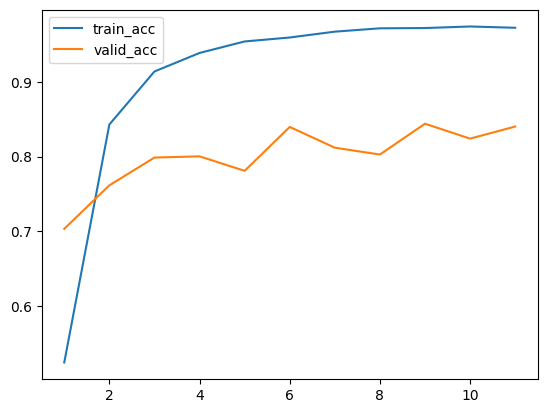

In [59]:
plt.plot(epochs,training_model.history['accuracy'] , label = 'train_acc')
plt.plot(epochs,training_model.history['val_accuracy'] , label='valid_acc')
plt.legend()
plt.show()

In [60]:
class_name = validation_set.class_names
class_name

['Arive-Dantu',
 'Basale',
 'Betel',
 'Crape_Jasmine',
 'Curry',
 'Drumstick',
 'Fenugreek',
 'Guava',
 'Hibiscus',
 'Indian_Beech',
 'Indian_Mustard',
 'Jackfruit',
 'Jamaica_Cherry-Gasagase',
 'Jamun',
 'Jasmine',
 'Karanda',
 'Lemon',
 'Mango',
 'Mexican_Mint',
 'Mint',
 'Neem',
 'Oleander',
 'Parijata',
 'Peepal',
 'Pomegranate',
 'Rasna',
 'Rose_apple',
 'Roxburgh_fig',
 'Sandalwood',
 'Tulsi']

In [61]:
test_set =tf.keras.utils.image_dataset_from_directory(
    'new_validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224,224),
    shuffle=False,# one by one check all the directory
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3706 files belonging to 30 classes.


In [62]:
y_pred = model.predict(test_set)
y_pred

116/116 ━━━━━━━━━━━━━━━━━━━━ 16s 141ms/step


array([[3.18579555e-01, 8.67365912e-08, 6.46578381e-04, ...,
        1.39408894e-06, 4.52713168e-04, 4.93772750e-05],
       [6.60249531e-01, 5.42381651e-09, 1.88182310e-06, ...,
        2.04286504e-10, 1.01712640e-05, 3.54779761e-09],
       [9.85297978e-01, 7.02417514e-04, 1.67919261e-05, ...,
        2.16240960e-06, 8.50950310e-05, 9.00101440e-06],
       ...,
       [2.10923683e-02, 2.78731623e-05, 2.35145399e-06, ...,
        4.67023597e-07, 6.58288118e-05, 8.07582796e-01],
       [1.37047237e-03, 1.07238588e-06, 5.71947076e-08, ...,
        3.97494341e-06, 1.34523884e-06, 6.84828579e-01],
       [2.98461947e-03, 7.54751284e-08, 4.73136952e-09, ...,
        1.29804533e-07, 1.24632145e-08, 9.47002113e-01]], dtype=float32)

In [63]:
y_pred.shape

(3706, 30)

In [64]:
predicted_categories= tf.argmax(y_pred,axis=1)

In [65]:
predicted_categories

<tf.Tensor: shape=(3706,), dtype=int64, numpy=array([ 4,  0,  0, ..., 29, 29, 29], dtype=int64)>

In [66]:
true_categories = tf.concat([y for x,y in test_set] , axis=0)
true_categories #one hot encodding

<tf.Tensor: shape=(3706, 30), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [67]:
y_true= tf.argmax(true_categories,axis=1)
y_true

<tf.Tensor: shape=(3706,), dtype=int64, numpy=array([ 0,  0,  0, ..., 29, 29, 29], dtype=int64)>

In [68]:
from sklearn.metrics import classification_report , confusion_matrix
print(classification_report(y_true,predicted_categories ,target_names = class_name))

                         precision    recall  f1-score   support

            Arive-Dantu       0.68      0.55      0.61       128
                 Basale       0.79      0.91      0.85       128
                  Betel       0.68      0.91      0.77       108
          Crape_Jasmine       0.72      0.73      0.73       128
                  Curry       0.72      0.55      0.63       128
              Drumstick       0.93      0.82      0.87       128
              Fenugreek       0.99      0.99      0.99       128
                  Guava       0.92      0.95      0.94       128
               Hibiscus       0.73      0.93      0.82       100
           Indian_Beech       0.75      0.84      0.79       128
         Indian_Mustard       0.85      0.98      0.91       128
              Jackfruit       0.91      0.98      0.94       128
Jamaica_Cherry-Gasagase       0.89      0.84      0.86       128
                  Jamun       0.74      0.99      0.84        90
                Jasmine 

In [69]:
cm = confusion_matrix(y_true , predicted_categories)
cm.shape

(30, 30)

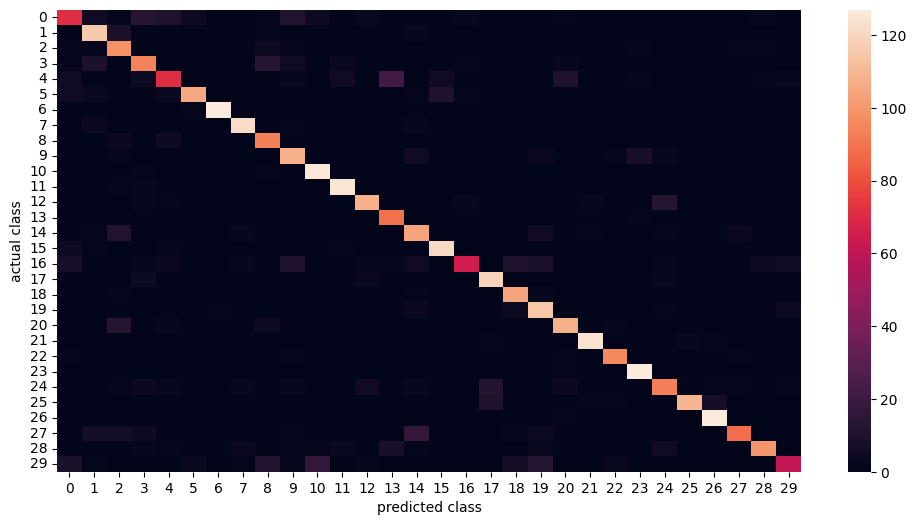

In [70]:
plt.figure(figsize = (12,6))
sns.heatmap(cm)
plt.xlabel('predicted class')
plt.ylabel('actual class')
plt.show()

In [102]:
import tensorflow as tf
import numpy as np

# Pre-image should be a path, not an array
pre_img = r"D:\MedicalPlant\new_train\Basale\__0_1233504.png"  # Make sure this is the actual path to the image file

# Load and preprocess the image
image = tf.keras.preprocessing.image.load_img(pre_img, target_size=(224,224))
input_array = tf.keras.preprocessing.image.img_to_array(image)
input_array = np.array([input_array])  # Add batch dimension
print(input_array.shape)

(1, 224, 224, 3)


In [103]:
prediction = model.predict(input_array)
prediction ,prediction.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


(array([[1.6962441e-04, 9.9869895e-01, 3.1049456e-06, 1.9331188e-04,
         9.3406477e-08, 4.0472550e-09, 5.9564256e-11, 5.6997090e-10,
         9.1697730e-04, 6.3199273e-06, 2.1735558e-07, 2.3415241e-06,
         6.7816666e-07, 7.8984437e-09, 2.3258563e-08, 3.1678181e-07,
         2.8459138e-07, 3.6990233e-10, 3.4899344e-07, 2.1440023e-09,
         8.7507097e-08, 8.8463930e-09, 5.7022821e-06, 3.6409115e-10,
         1.8619113e-08, 3.3056307e-09, 1.1622623e-08, 1.4694517e-06,
         2.5355870e-10, 1.1859191e-07]], dtype=float32),
 (1, 30))

In [104]:
result_index = np.argmax(prediction)
result_index

1

In [107]:
import tensorflow as tf
import numpy as np

# Pre-image should be a path, not an array
pre_img = r"D:\MedicalPlant\new_train\Basale\__0_1233504.png"  # Make sure this is the actual path to the image file

# Load and preprocess the image
image = tf.keras.preprocessing.image.load_img(pre_img, target_size=(224,224))
input_array = tf.keras.preprocessing.image.img_to_array(image)
input_array = np.array([input_array])  # Add batch dimension
print(input_array.shape)

(1, 224, 224, 3)


In [108]:
prediction = model.predict(input_array)
prediction , prediction.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


(array([[1.6962441e-04, 9.9869895e-01, 3.1049456e-06, 1.9331188e-04,
         9.3406477e-08, 4.0472550e-09, 5.9564256e-11, 5.6997090e-10,
         9.1697730e-04, 6.3199273e-06, 2.1735558e-07, 2.3415241e-06,
         6.7816666e-07, 7.8984437e-09, 2.3258563e-08, 3.1678181e-07,
         2.8459138e-07, 3.6990233e-10, 3.4899344e-07, 2.1440023e-09,
         8.7507097e-08, 8.8463930e-09, 5.7022821e-06, 3.6409115e-10,
         1.8619113e-08, 3.3056307e-09, 1.1622623e-08, 1.4694517e-06,
         2.5355870e-10, 1.1859191e-07]], dtype=float32),
 (1, 30))

In [109]:
result_index = np.argmax(prediction)
result_index

1

In [110]:
all_class_name = [
'Arive-Dantu',
 'Basale',
 'Betel',
 'Crape_Jasmine',
 'Curry',
 'Drumstick',
 'Fenugreek',
 'Guava',
 'Hibiscus',
 'Indian_Beech',
 'Indian_Mustard',
 'Jackfruit',
 'Jamaica_Cherry-Gasagase',
 'Jamun',
 'Jasmine',
 'Karanda',
 'Lemon',
 'Mango',
 'Mexican_Mint',
 'Mint',
 'Neem',
 'Oleander',
 'Parijata',
 'Peepal',
 'Pomegranate',
 'Rasna',
 'Rose_apple',
 'Roxburgh_fig',
 'Sandalwood',
 'Tulsi'
]

In [111]:
# diplaying the result
model_prediction = all_class_name[result_index]
model_prediction

'Basale'

In [99]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [106]:
# load the model by using keras tensorflow

model = tf.keras.models.load_model(r'D:\MedicalPlant\trained_model_2.0.keras')

In [101]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 224, 224, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 112, 112, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 112, 112, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 56, 56, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1024)           │    25,691,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 30)             │        30,750 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,054,782 (198.57 MB)

 Trainable params: 26,027,390 (99.29 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 26,027,392 (99.29 MB)